<a href="https://colab.research.google.com/github/ankit-kothari/machine_vison/blob/master/hand_written_digit_recognition_with_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**SHAPES AND DATA VISUALIZING THE IMAGE DATA**

 Training Data (60000, 28, 28)
 Test Data (10000, 28, 28)
 Train Labels (60000,)
 Test Labels (10000,)


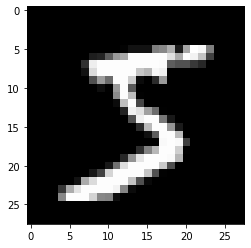

In [6]:
print(f' Training Data {x_train.shape}')
print(f' Test Data {x_test.shape}')
print(f' Train Labels {y_train.shape}')
print(f' Test Labels {y_test.shape}')
plt.imshow(x_train[0], cmap='gray')

**CONVERTING INTO CATEGORICAL DATA (ONE HOT CODING OF THE TARGET VALUES)**

In [0]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

**SCALING THE DATA**

In [0]:
x_train = x_train/255
x_test = x_test/255

**For a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.**

In [9]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)
print(f' Training Data {x_train.shape}')
print(f' Test Data {x_test.shape}')

 Training Data (60000, 28, 28, 1)
 Test Data (10000, 28, 28, 1)


**MODEL ARCHITECTURE**

In [0]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


**MODEL TRAINING**

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [13]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1433 - accuracy: 0.9571 - val_loss: 0.0544 - val_accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0490 - accuracy: 0.9849 - val_loss: 0.0427 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0363 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0360 - val_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0481 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0120 - accuracy: 0.9957 - val_loss: 0.0459 - val_accuracy: 0.9877


In [22]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.143327,0.957050,0.054388,0.9830
1,0.048981,0.984867,0.042727,0.9866
2,0.031072,0.990200,0.036329,0.9881
3,0.020809,0.993617,0.035954,0.9888
4,0.014764,0.995067,0.048103,0.9866


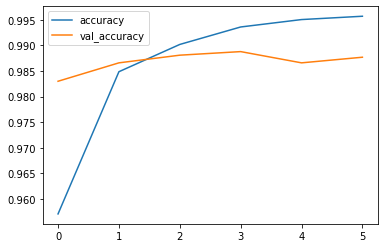

In [23]:
losses[['accuracy','val_accuracy']].plot()

**ACCURACY 98.7%**

In [26]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04593820497393608, 0.9876999855041504]


**SAVING AND LOADING THE MODEL**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model.save('/content/drive/My Drive/models/digit_detection.h5')

In [0]:
from tensorflow.keras.models import load_model
auto_encoder = load_model('/content/drive/My Drive/models/digit_detection.h5')

In [0]:
preds= auto_encoder.predict(x_test.reshape(-1,28,28,1))

**MODEL CONFUSION MATRIX**

In [20]:
preds_name = np.argmax(preds, axis=1)
preds_name

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
confusion_matrix(y_test,preds_name)

array([[ 973,    0,    1,    0,    1,    0,    3,    0,    1,    1],
       [   0, 1125,    2,    0,    2,    0,    2,    1,    2,    1],
       [   1,    0, 1023,    1,    0,    0,    1,    3,    3,    0],
       [   0,    0,    3,  998,    0,    5,    0,    0,    4,    0],
       [   0,    0,    1,    0,  974,    0,    2,    0,    0,    5],
       [   1,    0,    1,    6,    0,  880,    2,    0,    2,    0],
       [   5,    2,    1,    0,    1,    0,  948,    0,    1,    0],
       [   0,    1,   11,    4,    0,    0,    0, 1005,    2,    5],
       [   3,    0,    2,    0,    0,    0,    0,    1,  965,    3],
       [   2,    1,    0,    1,    4,    5,    0,    2,    8,  986]])

**HANDWRITTEN DIGIT DETECTION** 

In [0]:
import numpy as np
import cv2


**LOADING IN THE IMAGE**

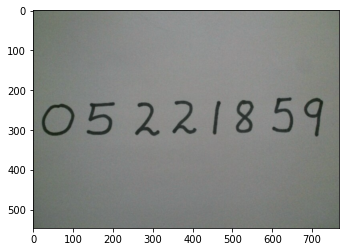

In [32]:
image = cv2.imread('/content/drive/My Drive/images/digit3.jpg')
plt.imshow(image, cmap='gray')

**IMAGE PREPROCESSING**

a) Converting Image to grayscale and blurinng the image

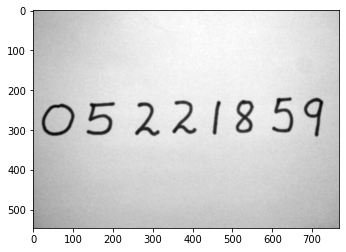

In [37]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')

b) Applying EDGE Detection 

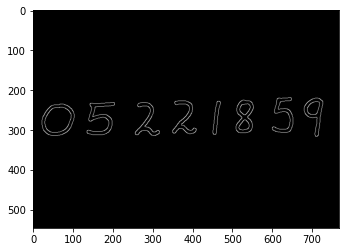

In [38]:
edged = cv2.Canny(blurred, 30, 150)
plt.imshow(edged, cmap='gray')

c) Using openCV's dilation to enhance the image

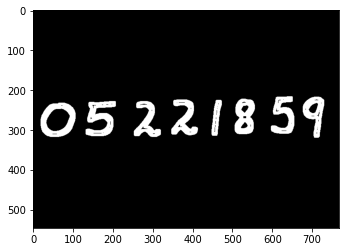

In [39]:
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(edged, kernel, iterations = 3)
plt.imshow(dilation, cmap='gray')
plt.show()

d) contour detection 

In [40]:
contours, h = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

8


e) Finding the bounding boxes for each of the contour

In [41]:
rects = [cv2.boundingRect(ctr) for ctr in contours]
rects

[(19, 232, 88, 86),
 (253, 228, 68, 90),
 (132, 228, 76, 88),
 (448, 225, 26, 90),
 (347, 224, 67, 90),
 (506, 222, 51, 89),
 (677, 217, 54, 103),
 (597, 216, 59, 94)]

**FEEDING THE IMAGE TO THE MODEL AND MAKING PREDICTIONS**

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


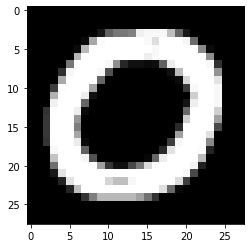

[0]


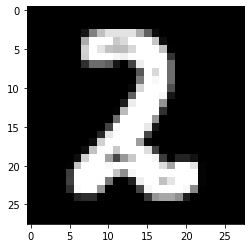

[2]


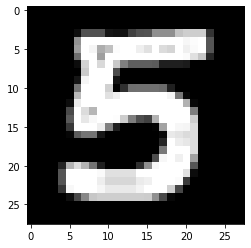

[5]


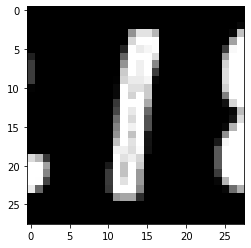

[1]


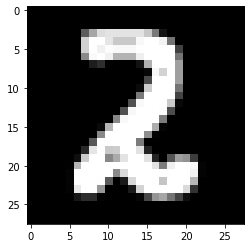

[2]


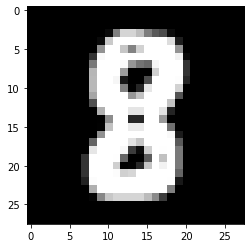

[8]


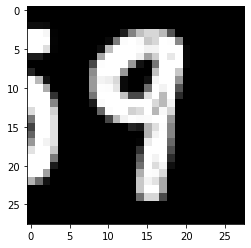

[9]


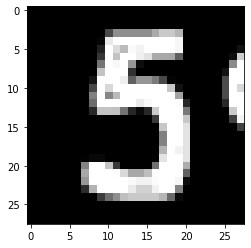

[5]


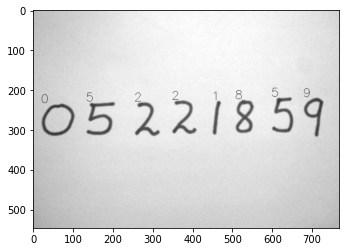

In [42]:
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np

for rect in rects:
 if rect[2]>5 and rect[3]>=25:
  #cv2.rectangle(blurred, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
  # Make the rectangular region around the digit
  leng = int(rect[3] * 1.3)
  pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
  pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
  roi = dilation[pt1:pt1+leng, pt2:pt2+leng]

  # Resize the image
  roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
  #roi = cv2.dilate(roi, (3, 3))
  plt.imshow(roi,cmap='gray')
  plt.show()
  roi=roi/255
  roi=roi.reshape(1,28,28,1)
  
  preds1= auto_encoder.predict(roi)
  preds_name1 = np.argmax(preds1, axis=1)
  print(preds_name1)
  number = str(int(float(preds_name1)))
  cv2.putText(blurred, number, (rect[0], rect[1]),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
  plt.imshow(blurred,cmap='gray')



**ANNOTATED IMAGE WITH MODEL PREDICTIONS**

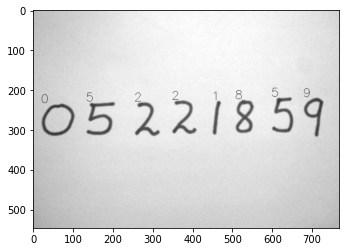

In [44]:
plt.imshow(blurred,cmap='gray')